# Import Libraries & Connect to Google Drive

In [1]:
#Connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Read data
import pandas as pd

#Import metrix
import numpy as np

#Data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# For model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load Data

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data sci/The Data Master _ project/house-price-prediction.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# See data represented with numbers
numerical_data = df.select_dtypes("number")
numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [7]:
# # See data represented with string
string_data = df.select_dtypes(object)
string_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  ExterQual      1460 non-null

# Data analysis (Initial)

### Sale price analysis

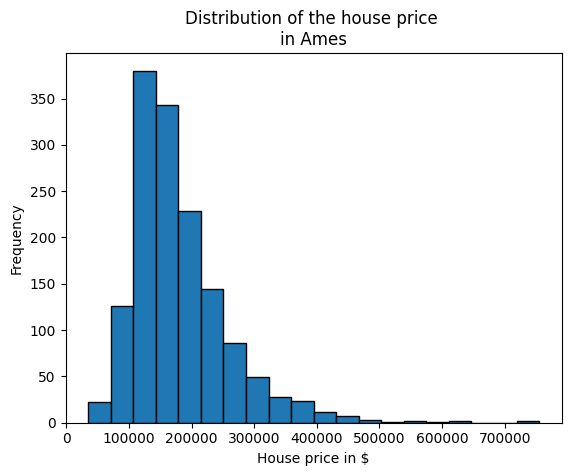

In [8]:
df['SalePrice'].plot.hist(bins=20, edgecolor="black")
plt.xlabel("House price in $")
_ = plt.title("Distribution of the house price \nin Ames")

In [9]:
# How expensive are houses?
print('The cheapest house sold for ${:,.0f} and the most expensive for ${:,.0f}'.format(
    df.SalePrice.min(), df.SalePrice.max()))
print('The average sales price is ${:,.0f}, while median is ${:,.0f}'.format(
    df.SalePrice.mean(), df.SalePrice.median()))

The cheapest house sold for $34,900 and the most expensive for $755,000
The average sales price is $180,921, while median is $163,000


In [10]:
df['SalePrice'].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

### Yearbuild count

Oldest house built in 1872. Newest house built in 2010.


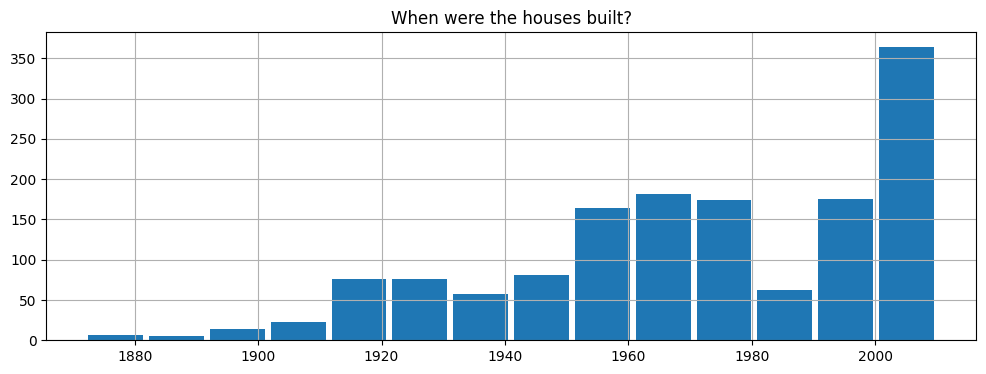

In [11]:
# When were the houses built?
print('Oldest house built in {}. Newest house built in {}.'.format(
    df.YearBuilt.min(), df.YearBuilt.max()))
df.YearBuilt.hist(bins=14, rwidth=.9, figsize=(12,4))
plt.title('When were the houses built?')
plt.show()

### Number of houses sold in a period

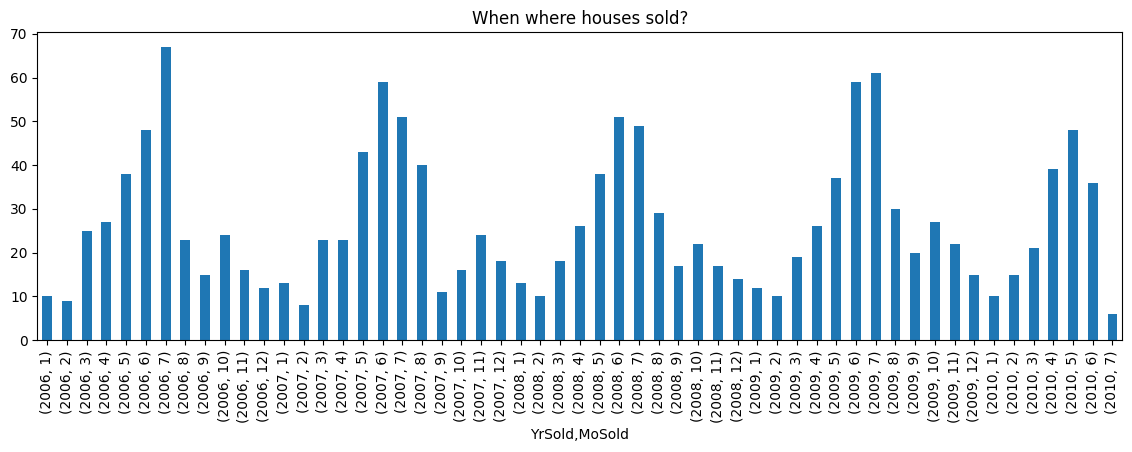

In [12]:
# When where houses sold?
df.groupby(['YrSold','MoSold']).Id.count().plot(kind='bar', figsize=(14,4))
plt.title('When where houses sold?')
plt.show()

### Number of house in each neighborhood

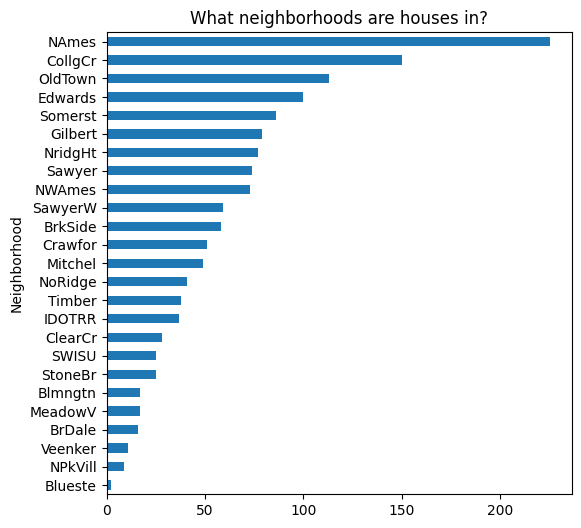

In [13]:
# Where are houses?
df.groupby('Neighborhood').Id.count().\
    sort_values().\
    plot(kind='barh', figsize=(6,6))
plt.title('What neighborhoods are houses in?')
plt.show()

### Number of houses with overall quality

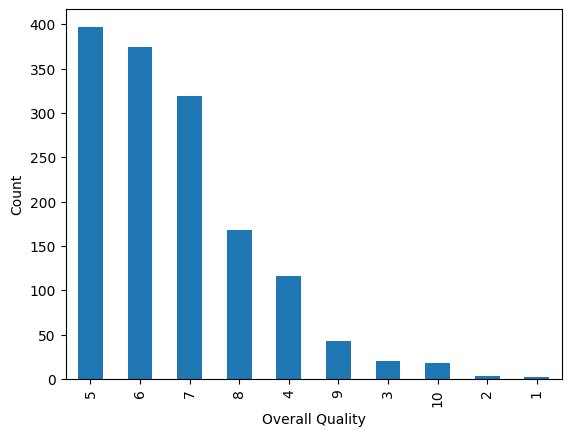

In [14]:
# Plot a bar chart for the count of each value in the 'OverallQual' column
fig, ax = plt.subplots()
df['OverallQual'].value_counts().plot(kind='bar', ax=ax)
ax.set_xlabel('Overall Quality')
ax.set_ylabel('Count')
plt.show()

### sales price compare with neigborhood

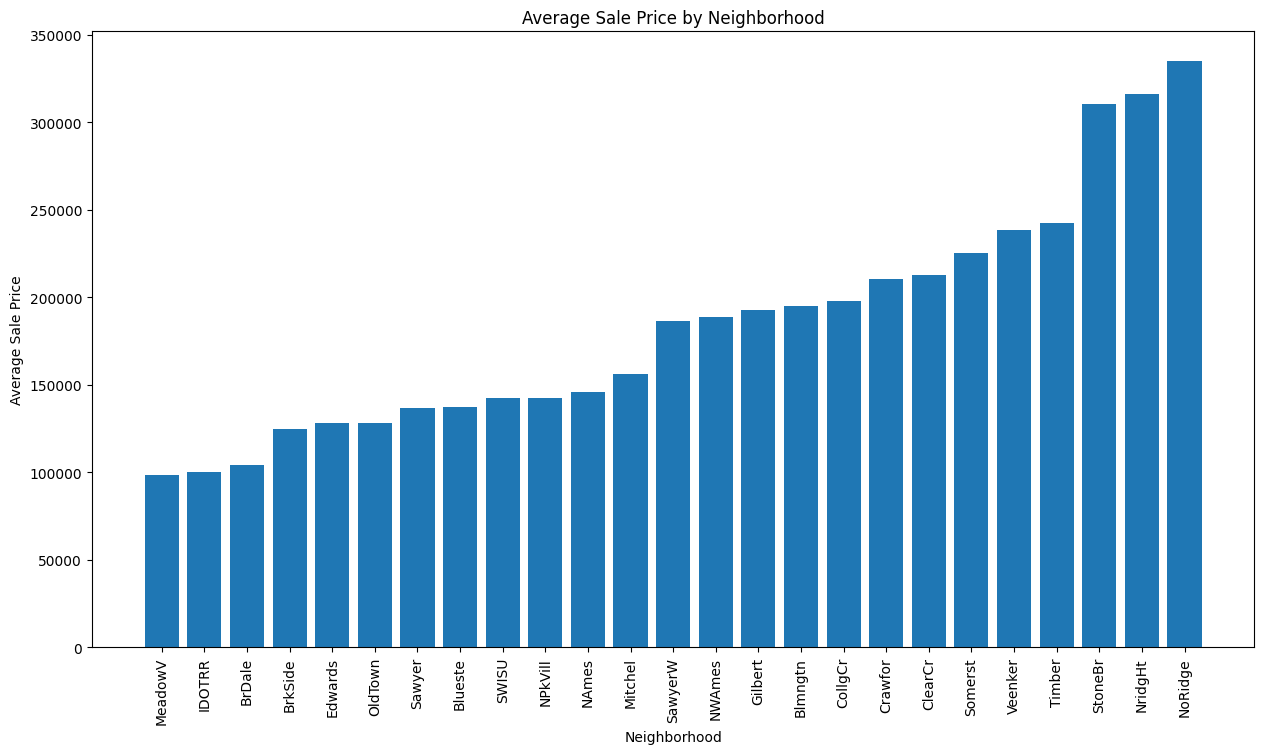

In [15]:
# Group by neighborhood and calculate the mean sale price
grouped = df.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=True)

# Create bar plot
plt.figure(figsize=(15, 8))
plt.bar(grouped.index, grouped.values)
plt.xlabel('Neighborhood')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Neighborhood')
plt.xticks(rotation=90)
plt.show()

### SalesPriceGroup compare with household counts



In [16]:
bins = [0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000]
df['SalesPriceGroup'] = pd.cut(df['SalePrice'], bins=bins, 
                                 labels=['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5', 'Group 6', 'Group 7', 'Group 8'])

In [17]:
df['SalesPriceGroup'] = df['SalesPriceGroup'].replace({'Group 1': '0 - 100,000', 'Group 2': '100,000 - 200,000',
                                                       'Group 3': '200,000 - 300,000', 'Group 4': '300,000 - 400,000',
                                                        'Group 5': '400,000 - 500,000', 'Group 6': '600,000 - 700,000 ',
                                                        'Group 7': '600,000 - 700,000', 'Group 8': '700,000 - 800,000'})

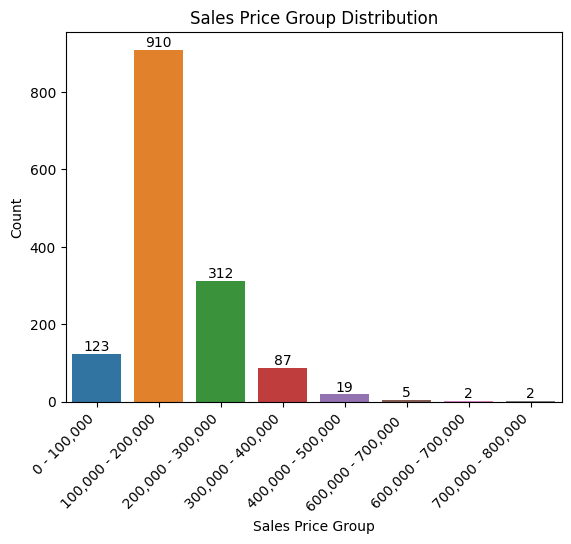

In [18]:
value_counts = df['SalesPriceGroup'].value_counts().sort_index()
sns.barplot(x=value_counts.index, y=value_counts.values)
plt.xlabel('Sales Price Group')
plt.ylabel('Count')
plt.title('Sales Price Group Distribution')
plt.xticks(rotation=45, ha='right')
for i in range(len(value_counts)):
    count = value_counts.values[i]
    plt.annotate(str(count), xy=(i, count), ha='center', va='bottom')
plt.show()

### count house with house style groups

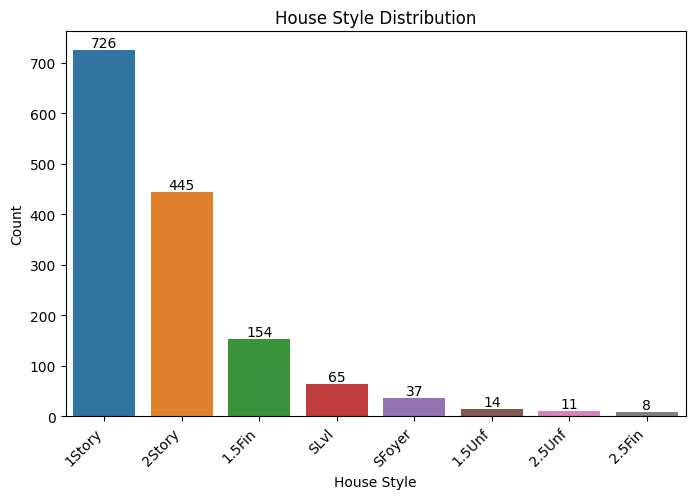

In [19]:
# Group by house style and count the number of houses in each group
house_style_counts = df['HouseStyle'].value_counts()

# Create bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=house_style_counts.index, y=house_style_counts.values)
plt.xlabel('House Style')
plt.ylabel('Count')
plt.title('House Style Distribution')
plt.xticks(rotation=45, ha='right')
for i in range(len(house_style_counts)):
    count = house_style_counts.values[i]
    plt.annotate(str(count), xy=(i, count), ha='center', va='bottom')
plt.show()

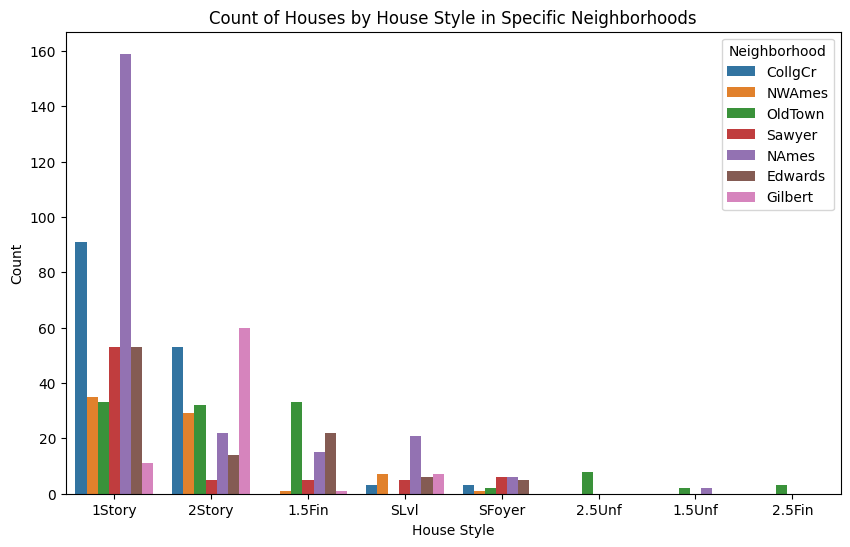

In [20]:
# Filter data for specific neighborhoods
neighborhoods = ['NAmes', 'CollgCr', 'OldTown', 'Sawyer', 'Edwards', 'Gilbert', 'NWAmes']
df_filtered = df[df['Neighborhood'].isin(neighborhoods)]

# Create a count plot of HouseStyle in specific neighborhoods
plt.figure(figsize=(10,6))
sns.countplot(x='HouseStyle', data=df_filtered, hue='Neighborhood', order=df_filtered['HouseStyle'].value_counts().index)
plt.xlabel('House Style')
plt.ylabel('Count')
plt.title('Count of Houses by House Style in Specific Neighborhoods')
plt.legend(title='Neighborhood')
plt.show()

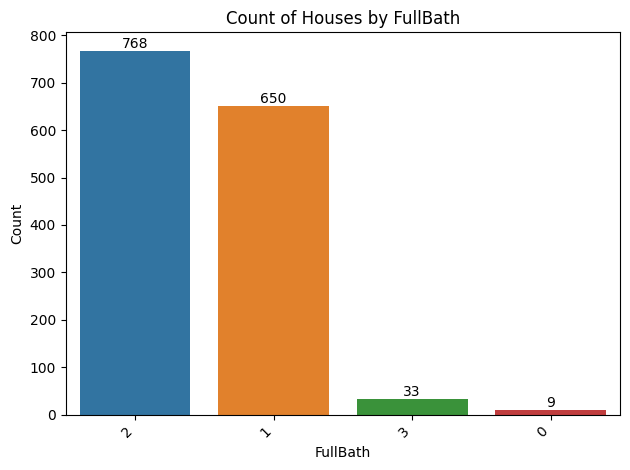

In [21]:
value_counts = df['FullBath'].value_counts()
sorted_counts = value_counts.sort_values(ascending=False)
sns.barplot(x=sorted_counts.index, y=sorted_counts.values, order=sorted_counts.index)
plt.xticks(rotation=45, ha='right')
plt.xlabel('FullBath')
plt.ylabel('Count')
plt.title('Count of Houses by FullBath')
plt.tight_layout()
for i in range(len(sorted_counts)):
    count = sorted_counts.values[i]
    plt.annotate(str(count), xy=(i, count), ha='center', va='bottom')
plt.show()

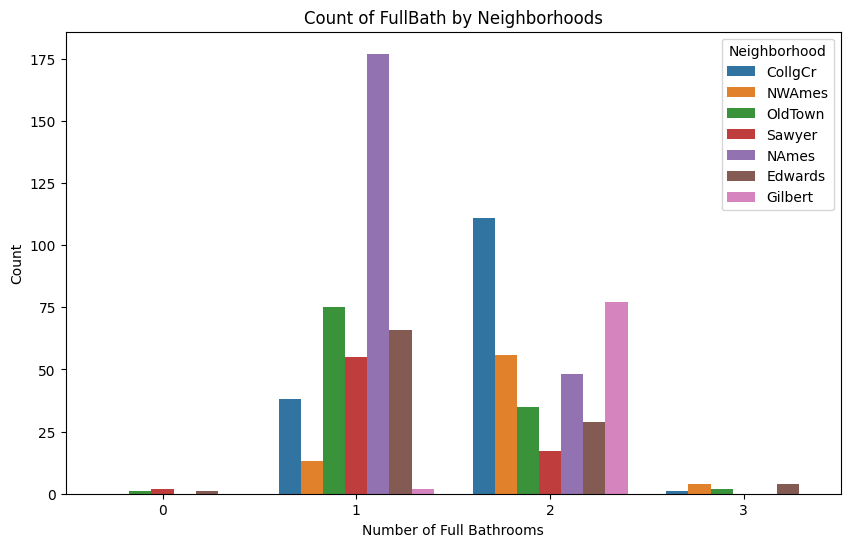

In [22]:
# Filter data for specific neighborhoods
neighborhoods = ['NAmes', 'CollgCr', 'OldTown', 'Sawyer', 'Edwards', 'Gilbert', 'NWAmes']
df_neighborhoods = df[df['Neighborhood'].isin(neighborhoods)]

# Create count plot
plt.figure(figsize=(10,6))
sns.countplot(x='FullBath', hue='Neighborhood', data=df_neighborhoods)
plt.title('Count of FullBath by Neighborhoods')
plt.xlabel('Number of Full Bathrooms')
plt.ylabel('Count')
plt.legend(title='Neighborhood', loc='upper right')
plt.show()

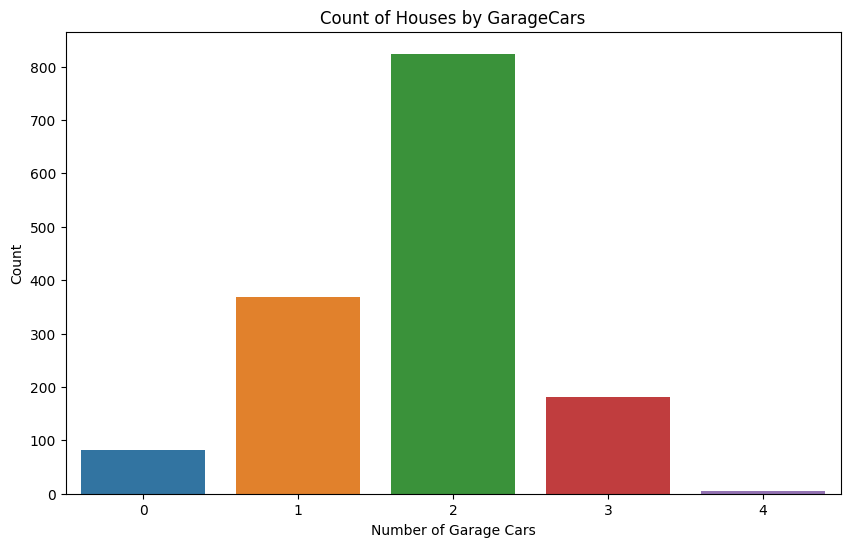

In [23]:
# Count houses by GarageCars
garage_count = df['GarageCars'].value_counts().sort_index()

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=garage_count.index, y=garage_count.values)
plt.xlabel('Number of Garage Cars')
plt.ylabel('Count')
plt.title('Count of Houses by GarageCars')
plt.show()

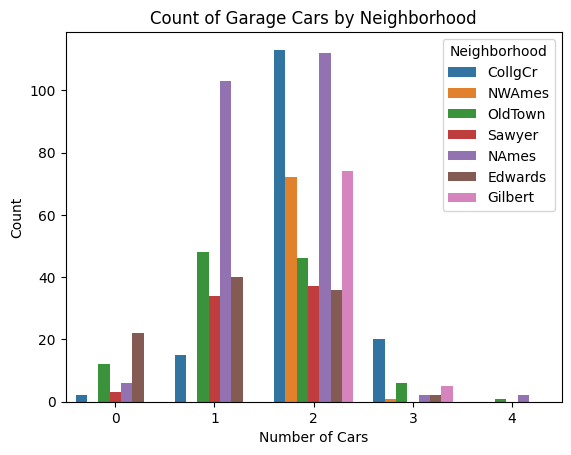

In [24]:
# Create a subset of the data for the specific neighborhoods
neighborhoods = ['NAmes', 'CollgCr', 'OldTown', 'Sawyer', 'Edwards', 'Gilbert', 'NWAmes']
subset = df[df['Neighborhood'].isin(neighborhoods)]

# Create a count plot of GarageCars
sns.countplot(x='GarageCars', hue='Neighborhood', data=subset)
plt.xlabel('Number of Cars')
plt.ylabel('Count')
plt.title('Count of Garage Cars by Neighborhood')
plt.legend(title='Neighborhood')
plt.show()

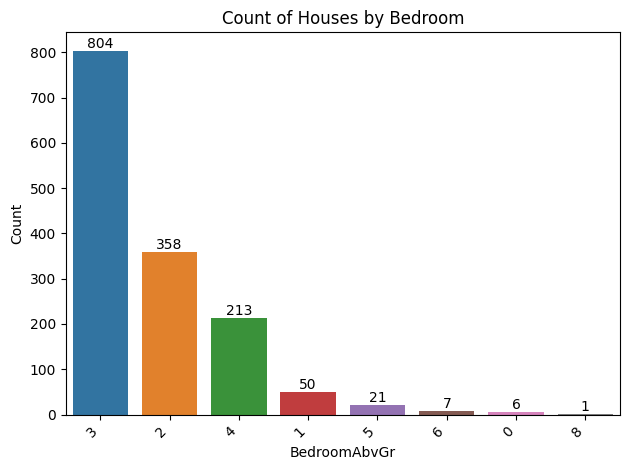

In [25]:
value_counts = df['BedroomAbvGr'].value_counts()
sorted_counts = value_counts.sort_values(ascending=False)
sns.barplot(x=sorted_counts.index, y=sorted_counts.values, order=sorted_counts.index)
plt.xticks(rotation=45, ha='right')
plt.xlabel('BedroomAbvGr')
plt.ylabel('Count')
plt.title('Count of Houses by Bedroom')
plt.tight_layout()
for i in range(len(sorted_counts)):
    count = sorted_counts.values[i]
    plt.annotate(str(count), xy=(i, count), ha='center', va='bottom')
plt.show()

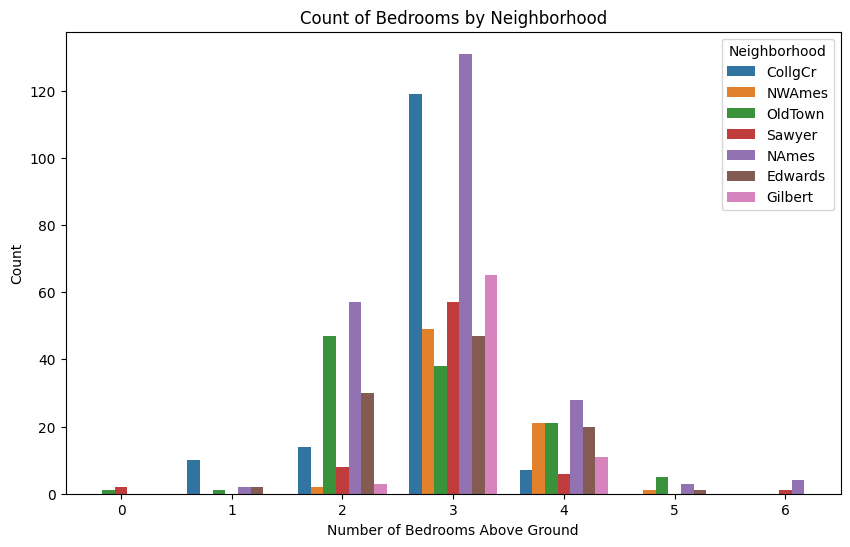

In [26]:
# Filter the data to include only specific neighborhoods
neighborhoods = ['NAmes', 'CollgCr', 'OldTown', 'Sawyer', 'Edwards', 'Gilbert', 'NWAmes']
df_filtered = df[df['Neighborhood'].isin(neighborhoods)]

# Create a count plot of BedroomAbvGr in each neighborhood
plt.figure(figsize=(10, 6))
sns.countplot(x='BedroomAbvGr', hue='Neighborhood', data=df_filtered, order=sorted(df_filtered['BedroomAbvGr'].unique()))
plt.title('Count of Bedrooms by Neighborhood')
plt.xlabel('Number of Bedrooms Above Ground')
plt.ylabel('Count')
plt.legend(title='Neighborhood', loc='upper right')
plt.show()

### Numerical feature analysis

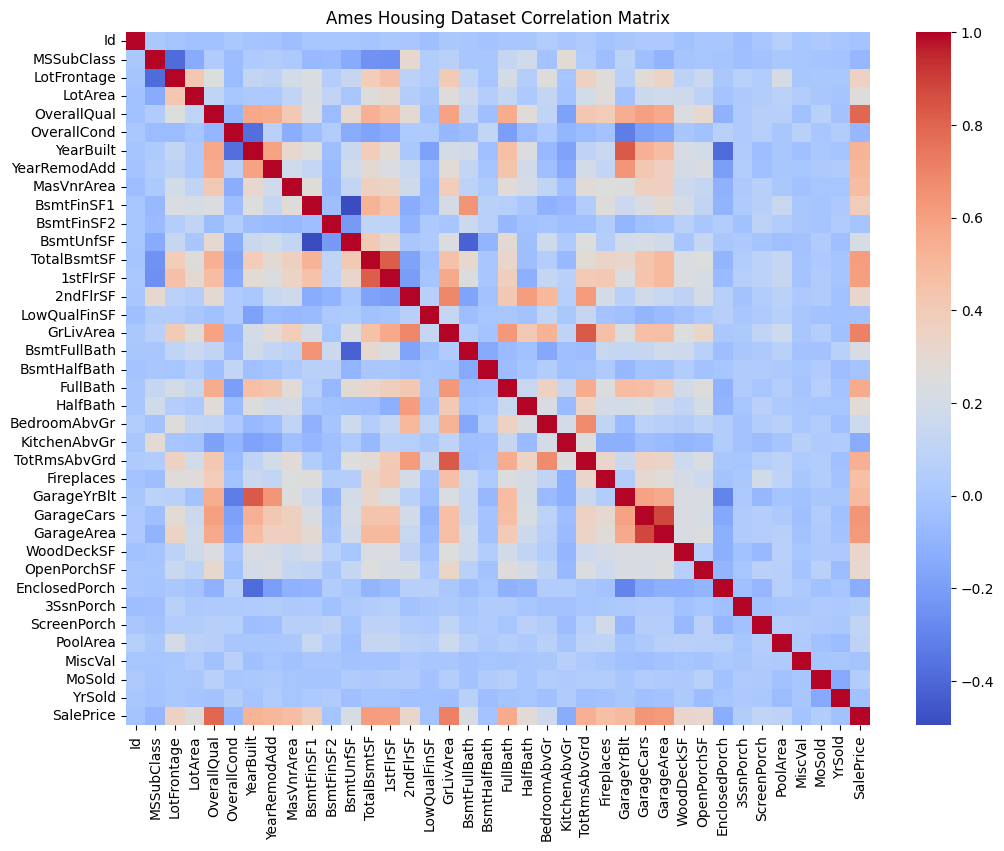

In [27]:
# Create a correlation matrix for all columns in the Ames Housing dataset
corr_matrix = df.corr()

# Create a larger figure to hold the heatmap
fig, ax = plt.subplots(figsize=(12, 9))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', ax=ax)
plt.title('Ames Housing Dataset Correlation Matrix')
plt.show()

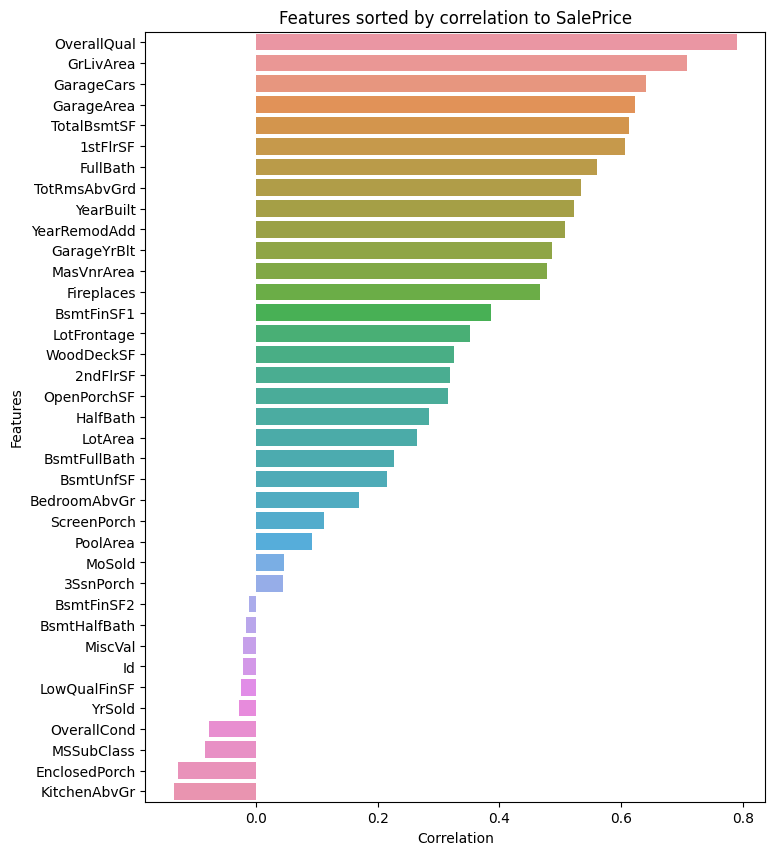

In [28]:
# Compute correlations between all pairs of columns
corr_matrix = df.corr()

# Sort correlations by SalePrice, in descending order
sorted_corr = corr_matrix['SalePrice'].sort_values(ascending=False)

# Create a bar plot of the sorted correlations
plt.figure(figsize=(8, 10))
sns.barplot(x=sorted_corr[1:], y=sorted_corr.index[1:], orient='h')
plt.title('Features sorted by correlation to SalePrice')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.show()

### Categorical features analysis

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:3861: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


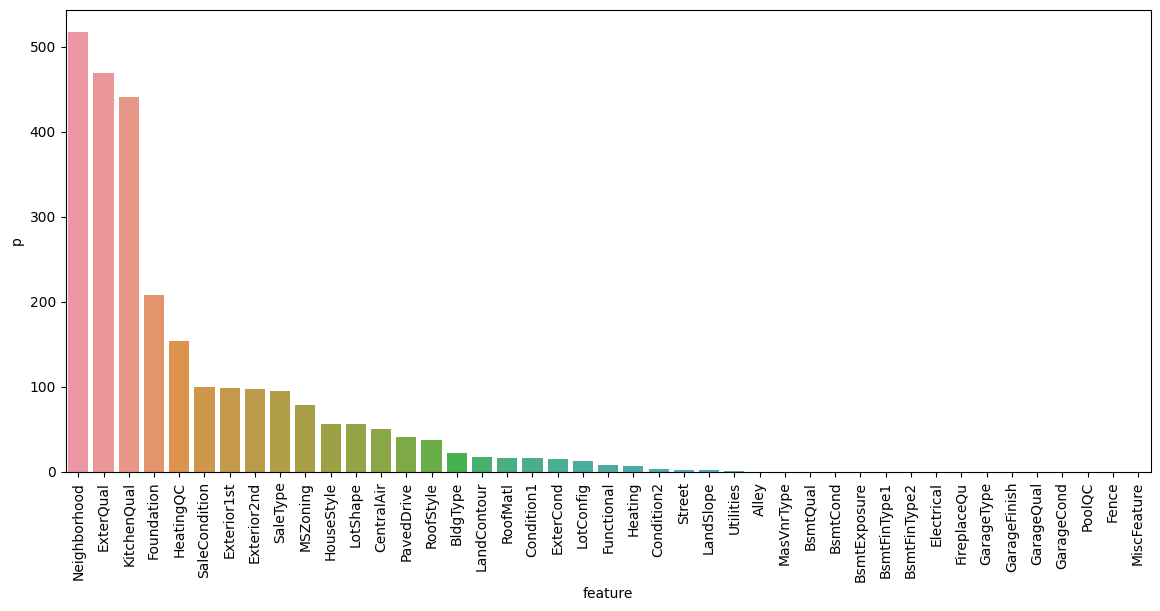

In [29]:
import scipy
from scipy.stats import f_oneway

# Create a subset of the data containing only the categorical features
cat_features = df.select_dtypes(include=['object'])

# In order for ANOVA to work, we have to take care of missing values first
cat_features = cat_features.fillna('Missing')

# Onward...
anova = {'feature':[], 'f':[], 'p':[]}
for cat in cat_features:
    group_prices = []
    for group in df[cat].unique():
        group_prices.append(df[df[cat] == group]['SalePrice'].values)
    f, p = f_oneway(*group_prices)
    anova['feature'].append(cat)
    anova['f'].append(f)
    anova['p'].append(p)
anova = pd.DataFrame(anova)
anova = anova[['feature','f','p']]
anova.sort_values('p', inplace=True, ascending=True)  # sort by p-value in descending order

# Plot
plt.figure(figsize=(14,6))
sns.barplot(x=anova.feature, y=np.log(1./anova['p']), order=anova['feature'])
plt.xticks(rotation=90)
plt.show()


# Preprocess the data

In [30]:
# Split dataset into independent & dependent datasets
X = df.drop('SalePrice', axis=1)
y = df.SalePrice

## Missing values

In [31]:
df = df.dropna(axis=1, thresh=len(df) * 0.8)  # Drop columns with more than 20% missing values
df = df.fillna(df.mean())  # Replace remaining missing values with the mean of the column

<ipython-input-31-712fa5c86e68>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())  # Replace remaining missing values with the mean of the column


In [32]:
X.shape

(1460, 81)

In [33]:
# removing highly correlated features to avoid multicolinearity
def corrdrop(df, maxcorr):
    corr_matrix = df.corr().abs() 
    mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
    tri_df = corr_matrix.mask(mask)
    to_drop = [x for x in tri_df.columns if any(tri_df[x] > maxcorr)]
    df = df.drop(to_drop, axis = 1)
    return df

X = corrdrop(X, 0.95)
print(f"The reduced dataframe has {X.shape[1]} columns.")

The reduced dataframe has 81 columns.


## Encoding categorical variables

In [34]:
# Encode categorical variables
cat_features = df.select_dtypes(include=['object'])
cat_features = cat_features.fillna('Missing')
df = pd.get_dummies(df)

## Scaling numeric features

In [35]:
# Scale numeric features
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = (df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std()

### Identify highly correlated numerical features

In [36]:
# Identify highly correlated numerical features with the target variable (SalePrice)
corr = df.corr()
num_features = corr[abs(corr['SalePrice']) > 0.5].index.tolist()

### Identify highly categorical features

In [37]:
# Identify highly significant categorical features using ANOVA F-test and p-values
anova = {'feature':[], 'f':[], 'p':[]}
for cat in cat_features:
    if cat not in df.columns:
        continue
    group_prices = []
    for group in df[cat].unique():
        group_prices.append(df[df[cat] == group]['SalePrice'].values)
    f, p = f_oneway(*group_prices)
    anova['feature'].append(cat)
    anova['f'].append(f)
    anova['p'].append(p)
anova = pd.DataFrame(anova)
anova = anova[['feature','f','p']]
anova.sort_values('p', inplace=True)

## Select relevant features

In [38]:
# Select relevant features
# In this case, we'll use the highly correlated numerical features and the top 10 significant categorical features
num_features.remove('SalePrice')
cat_features = anova.sort_values('p')['feature'].head(10).tolist()
features = num_features + cat_features

## Split the data into training and testing sets


In [39]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df['SalePrice'], test_size=0.2, random_state=42)

In [40]:
X_train.shape

(1168, 16)

In [41]:
X_test.shape

(292, 16)

# Train a random forest model

In [42]:
# Train a random forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [43]:
# Evaluate the model's performance on the testing set
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('RMSE:', rmse)

RMSE: 0.3207861952477974


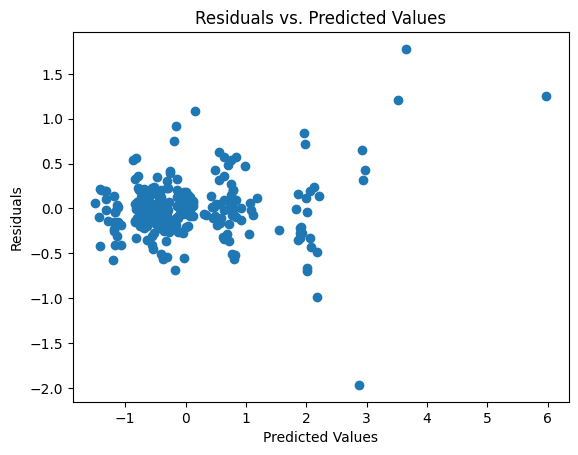

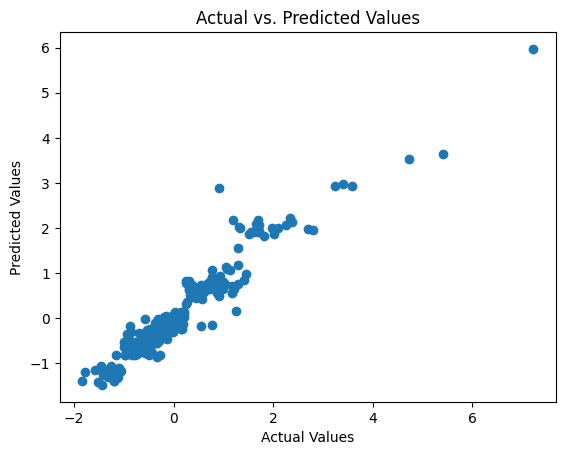

In [44]:
# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate the residuals
residuals = y_test - y_pred

# Plot the residuals against the predicted values
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

# Plot the predicted values against the actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

# Predict house prices for new data

Trend
SalePrice : 100,000 - 200,000 $

Neighborhood : NAmes, CollgCr, OldTown, Sawyer, Edwards, Gilbert, NWAmes

HouseStyle : 1 story

FullBath : 1 Fullbath

Bedroom : 3 Bedrooms

